# Scikit-learn Demo
## Josh Speagle (Harvard Astronomy MLJC 09/26/2017)

This notebook goes through some basic examples and uses of Python's **scikit-learn** package, which is a user-friendly machine learning package with [useful tutorials and excellent documentation](http://scikit-learn.org/stable/) where I've pulled most of the examples from. I originally presented much of the material here at UCSC last winter (Dec. 2016).

Before we begin, I'll first initialize the environment. I'm sometimes lazy and like to use Python like Matlab, so there's that. Additionally, I like my figures to have larger labels and axis markers, so I'll update those defaults as well.

In [1]:
%pylab
%matplotlib inline

from __future__ import print_function, division

# re-defining plotting defaults
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'xtick.color': 'k'})
rcParams.update({'ytick.color': 'k'})
rcParams.update({'font.size': 30})

random.seed(7)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Intro: Machine Learning from a Bayesian Perspective

It can be easy to get swept away in the magic of machine learning. Let's first consider some Bayesian motivation, and then move on to the more traditional definitions.

Let's say we have two objects: a training object $A \in \mathbf{A}$, whose properties we know, and an unknown object $B \in \mathbf{B}$, whose properties we want to predict. The Bayesian way to think about this is

\begin{equation}
P(A|B)=\frac{P(B|A)P(A)}{P(B)} = \frac{P(B|A)P(A)}{\sum_{A\in\mathbf{A}} P(B|A)P(A)},
\end{equation}

where $P(A|B)$ is the **posterior**, $P(B|A)$ is the **likelihood**, $P(A)$ is the **prior**, and $P(B)$ is the **evidence**. If we are interested in using $A$ as a go-between for some other property we care about (let's call it $Y$), then we can write that as

\begin{equation}
P(Y|B)= \sum_{A\in\mathbf{A}} P(Y|A)P(A|B).
\end{equation}

To probe $P(Y|B)$, we thus need to sample from the posterior. This requires us to know the likelihood and prior for all of the objects in our training set.

But what if we have no idea what the likelihood function is or what the priors should be? That's where machine learning comes to the rescue! Machine learning uses the training data to **directly probe the posterior** in a flexible way. I can't emphasize enough, however, that **we don't get this for free - we have to make some educated guesses about the basic properties of the data as well as the appoximate form the posterior will take** in order to make this happen. And it can be difficult to actually **interpret** what's actually going on afterwards.

# Overview

In general, what machine learning tries to do is make predictions from a set of **training data** to a set of unknown data. 

These broadly break down into a few main categories:
- **Supervised learning**, where we are trying to learn how a set of **features**/attributes (**X**) maps to a corresponding set of **targets**/labels (**Y**) in our training data. If these targets are discrete, this is referred to as **classification**. If the targets are **continuous**, this is referred to as **regression**.
- **Unsupervised learning**, where we are simply trying to find new representations of our features. This can be broadly divided into **clustering** (finding groups of similar objects), **density estimation** (turning discrete samples into continuous densities), and **manifold learning** (creating lower-dimensional representations of higher-dimensional datasets).

We'll quickly run through each of these using some of the data from the sklearn package. Let's import that now.

In [2]:
import sklearn
from sklearn import datasets

# Classification: Irises

The iris dataset is contains 3 different types of irises (Setosa, Versicolour, and Virginica). We want to try and classify them based on the lengths and widths of their petals and sepals.

In [3]:
iris = datasets.load_iris()  # load the iris dataset
iris_X = iris.data  # features
iris_y = iris.target  # targets

print(iris['DESCR'])  # print description

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

To test things out, we need to split up the data into a training and a testing set. **Testing your results on data you just fit will result in overfitting, so don't do it!** (More broadly, *any* communication between your training/testing sets will often bias your results.)

In [4]:
indices = random.permutation(len(iris_X))  # random permutation

# training set
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]

# testing set
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

## k Nearest Neighbors (kNN)

One of the simplest machine learning methods is the **$k$ Nearest Neighbors** ($k$NN) method, which literally is to just find the $k$ closest objects in feature space (by some distance metric) and then just perform some simple operation (the default is the mode I believe) over their targets. Doing this through sklearn is literally 4 lines of code.

In [5]:
from sklearn.neighbors import KNeighborsClassifier  # load kNN

knn = KNeighborsClassifier()  # initialize with defaults
knn.fit(iris_X_train, iris_y_train)  # train
yp = knn.predict(iris_X_test)  # predict

# check our results!
print(iris_y_test)
print(yp)

[0 2 1 1 0 2 1 2 1 0]
[0 2 1 2 0 2 1 2 1 0]


There are a bunch of hyperparameters at work here under the hood. We can see just how much tuning you can do by just querying the original object.

In [6]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

That's pretty solid. Visualizing how this actually works so we can see the actual **decision boundaries** takes a bit more code though.

In [7]:
# setting up plotting utils for later

from matplotlib.colors import ListedColormap

# create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X = iris_X_train[:, :2]
y = iris_y_train

# create mesh of input points
h = 0.02  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = meshgrid(arange(x_min, x_max, h), arange(y_min, y_max, h))  # (X,Y) mesh

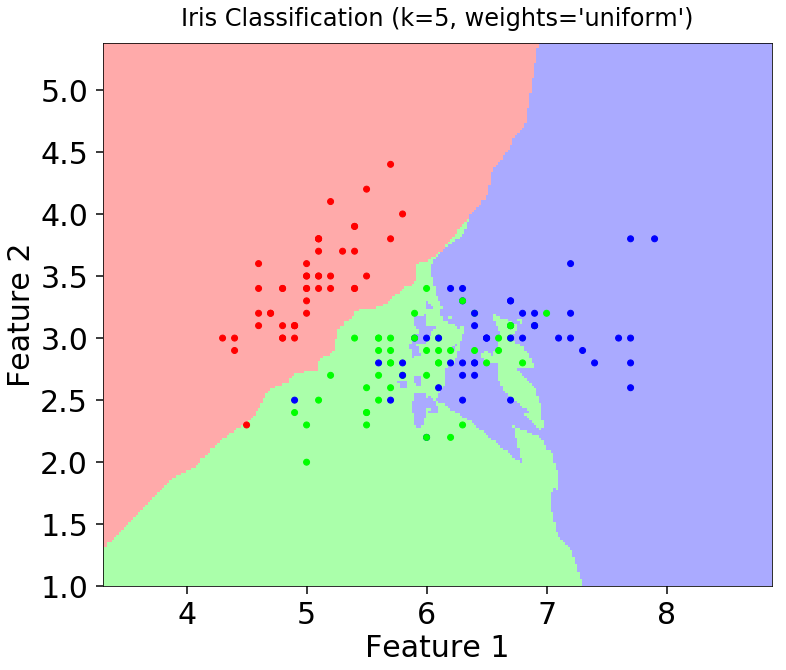

In [8]:
clf = knn  # alias for "classification learning function" (clf)
clf.fit(X, y)  # fit data
Z = clf.predict(c_[xx.ravel(), yy.ravel()])  # predicted classes

# plot mesh
figure(figsize=(12, 10))
Z = Z.reshape(xx.shape)
pcolormesh(xx, yy, Z, cmap=cmap_light)

# plot the training points too
scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
xlim(xx.min(), xx.max())
xlabel('Feature 1')
ylim(yy.min(), yy.max())
ylabel('Feature 2')
title("Iris Classification (k=%i, weights='%s')" % (knn.n_neighbors, knn.weights),
      fontsize=24, y=1.02);

## Logistic Regression

A rival to $k$NN? Fitting a line to things! While linear regression is the method of choice for regression problems, the equivalent for classification is fitting a logistic function:

\begin{equation}
y = \textrm{logistic}(X\beta - \alpha) + \epsilon =
\frac{1}{1 + \textrm{exp}(- X\beta + \alpha)} + \epsilon.
\end{equation}

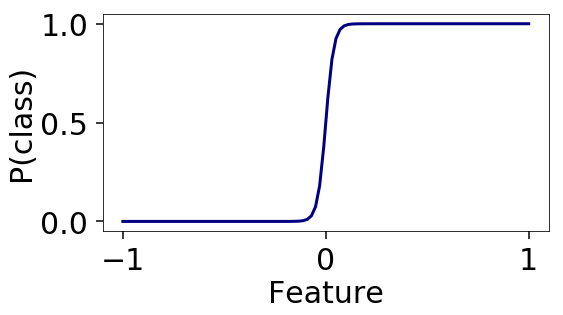

In [9]:
# plot logistic example
figure(figsize=(8, 4))
xgrid = linspace(-1, 1, 100)
plot(xgrid, 1. / (1 + exp(-50 * xgrid)), lw=3, color='navy')
xlabel('Feature')
ylabel('P(class)');

Let's see how we do fitting a logistic to our data. Again, the process is incredible straightforward and compact.

In [10]:
from sklearn import linear_model  # import model
logistic = linear_model.LogisticRegression(C=1e5)  # initialize the model
logistic.fit(iris_X_train, iris_y_train)  # fit the model
yp = logistic.predict(iris_X_test)  # predict using model

# print results
print(iris_y_test)
print(yp)

[0 2 1 1 0 2 1 2 1 0]
[0 2 1 1 0 2 1 2 1 0]


In [11]:
logistic

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

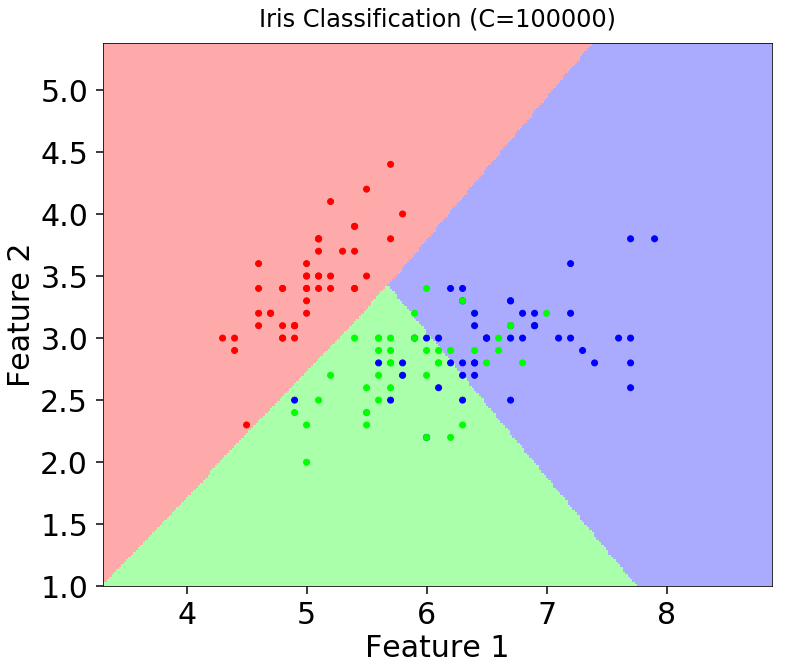

In [12]:
clf = logistic
clf.fit(X, y)
Z = clf.predict(c_[xx.ravel(), yy.ravel()])

# plot mesh
figure(figsize=(12, 10))
Z = Z.reshape(xx.shape)
pcolormesh(xx, yy, Z, cmap=cmap_light)

# plot the training points too
scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
xlim(xx.min(), xx.max())
xlabel('Feature 1')
ylim(yy.min(), yy.max())
ylabel('Feature 2')
title("Iris Classification (C=%i)" % (logistic.C), fontsize=24, y=1.02);

## Support Vector Machines (SVMs)

**Support Vector Machines** (SVMs) are essentially a fancier version of logistic regression, except you don't necessarily have to assume your decision boundaries are simple linear functions in your data. The complexity is instead set by the input **kernels**, which define the **inner product** over the feature space.

In [13]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)
yp = svc.predict(iris_X_test)

# print results
print(iris_y_test)
print(yp)

[0 2 1 1 0 2 1 2 1 0]
[0 2 1 2 0 2 1 2 1 0]


In [14]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

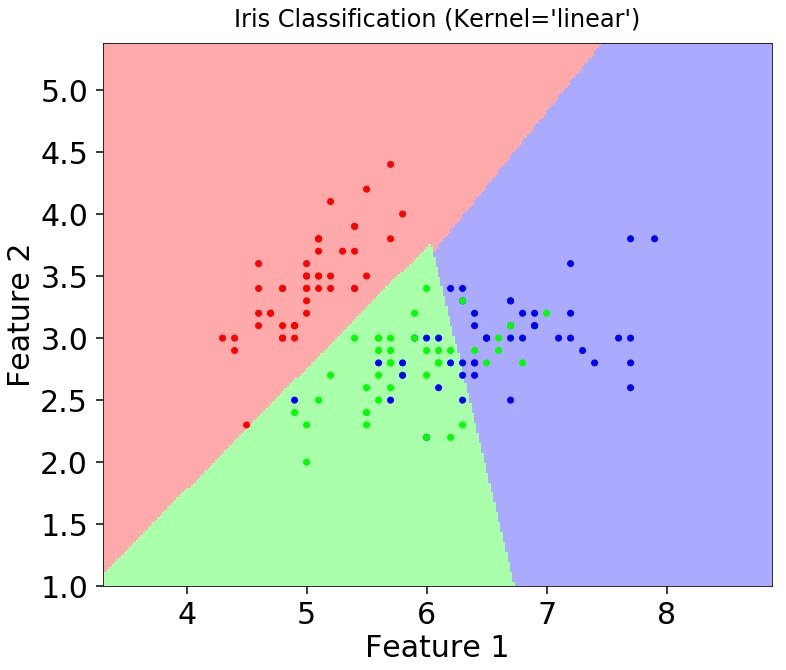

In [15]:
clf = svc
clf.fit(X, y)
Z = clf.predict(c_[xx.ravel(), yy.ravel()])

# plot mesh
figure(figsize=(12, 10))
Z = Z.reshape(xx.shape)
pcolormesh(xx, yy, Z, cmap=cmap_light)

# plot the training points too
scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
xlim(xx.min(), xx.max())
xlabel('Feature 1')
ylim(yy.min(), yy.max())
ylabel('Feature 2')
title("Iris Classification (Kernel='%s')" % (svc.kernel), fontsize=24, y=1.02);

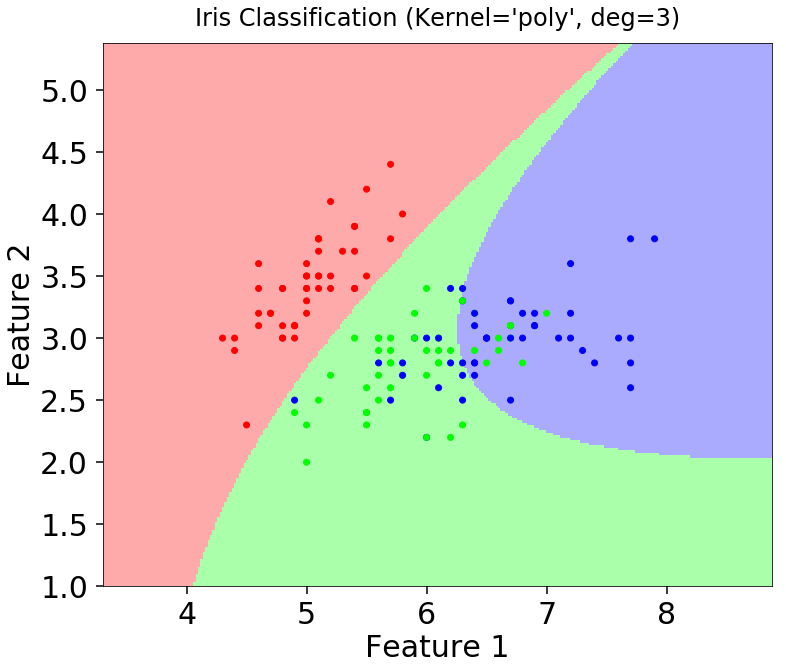

In [16]:
svc = svm.SVC(kernel='poly',degree=3)
clf = svc
clf.fit(X, y)
Z = clf.predict(c_[xx.ravel(), yy.ravel()])

# plot mesh
figure(figsize=(12, 10))
Z = Z.reshape(xx.shape)
pcolormesh(xx, yy, Z, cmap=cmap_light)

# plot the training points too
scatter(X[:, 0], X[:, 1],c=y, cmap=cmap_bold)
xlim(xx.min(), xx.max())
xlabel('Feature 1')
ylim(yy.min(), yy.max())
ylabel('Feature 2')
title("Iris Classification (Kernel='%s', deg=%d)" % (svc.kernel, svc.degree),
      fontsize=24, y=1.02);

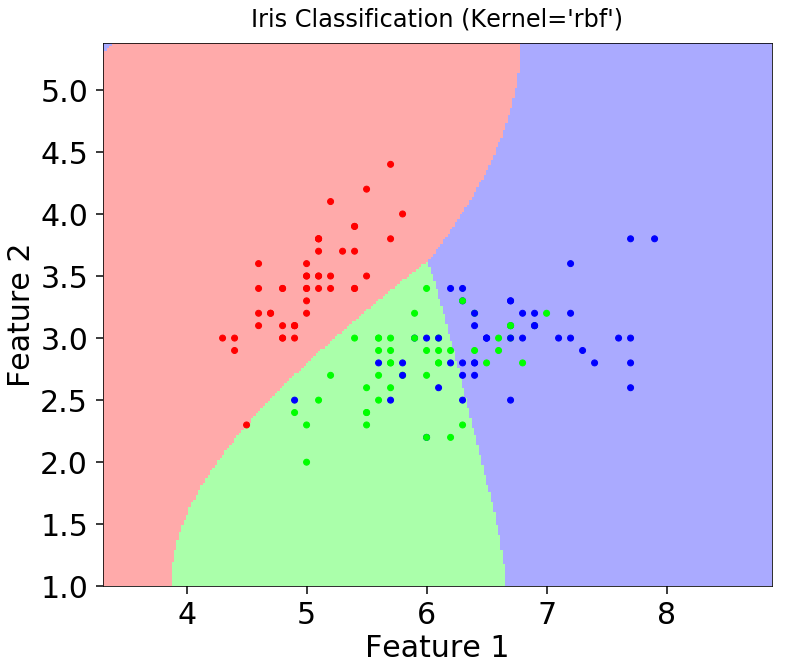

In [17]:
svc = svm.SVC(kernel='rbf')
clf = svc
clf.fit(X, y)
Z = clf.predict(c_[xx.ravel(), yy.ravel()])

# plot mesh
figure(figsize=(12, 10))
Z = Z.reshape(xx.shape)
pcolormesh(xx, yy, Z, cmap=cmap_light)

# plot the training points too
scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
xlim(xx.min(), xx.max())
xlabel('Feature 1')
ylim(yy.min(), yy.max())
ylabel('Feature 2')
title("Iris Classification (Kernel='%s')" % (svc.kernel), fontsize=24, y=1.02);

# Regression: Boston Housing Prices

We'll now move onto regression, where we get to use a bunch of variables to estimate housing prices in Boston. 

In [18]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Let's take a look at some of the data.

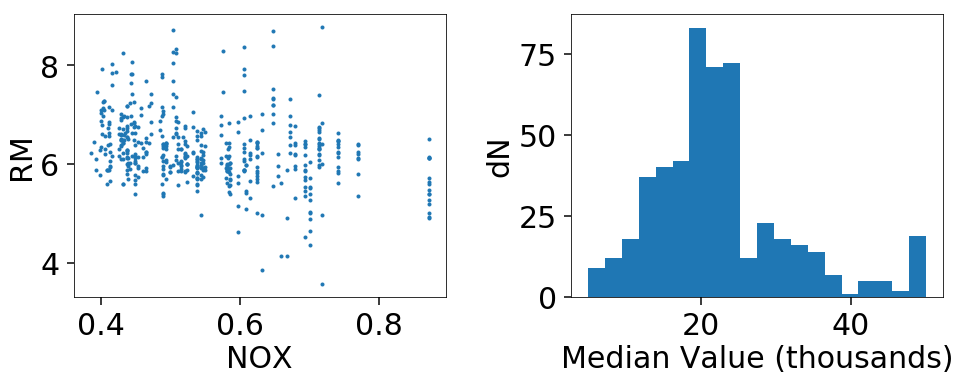

In [19]:
# plot figure
figure(figsize=(14, 6))
subplot(1, 2, 1)
plot(X[:, 4], X[:, 5], '.')
xlabel(boston.feature_names[4])
ylabel(boston.feature_names[5])
tight_layout()

subplot(1, 2, 2)
h = hist(y, bins=20)
xlabel('Median Value (thousands)')
ylabel('dN')
tight_layout()

## Linear Regression and Cross-Validation

We'll start by using simple **linear regression** and introduce two new concepts: **cross-validation** and **pre-processing**. 

In essence, it's pretty inefficient to be like "yo, let's just check our performance with 20% of the data" when you have all those training objects available! While there are a couple versions of this, the simplest is **$k$-fold cross-validation**, where you split the sample into $k$ distinct subsamples, and then use $k-1$ to train on and the remaining subsample to validate on. Do this $k$ times and you've essentially generated predictions to the entire training set *without cheating* (i.e. overfitting).

It's also sometimes hard to determine which features are informative from the fitted coefficients alone since they can all have different normalizations. We can correct for this by essentially **standardizing** everything to have $[\mu, \sigma] = [0, 1]$. This is an example of pre-processing the data to make things easier later on. Other examples include trying to remove correlations (via, e.g., Principle Component Analysis), pruning outliers (via, e.g., sigma clipping), adding combinations of features (via, e.g., a polynomial basis), and more!

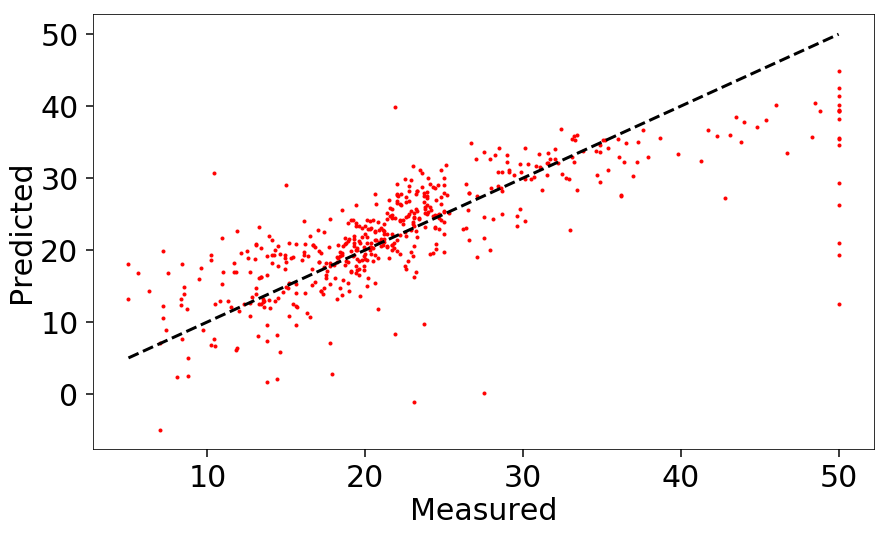

In [20]:
from sklearn.model_selection import cross_val_predict  # import cross validation module
from sklearn import preprocessing  # import pre-processing functions

# normalize features
X_norm = preprocessing.StandardScaler().fit_transform(X)

# predict values
lr = linear_model.LinearRegression() 
yp = cross_val_predict(lr, X_norm, y, cv=10)

# plot results
figure(figsize=(14, 8))
plot(y, yp, 'r.')
plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
xlabel('Measured')
ylabel('Predicted');

We can gain some insight into what's going on by looking at how much our coefficients are determined by each variable.

In [21]:
lr.fit(X, y)  # fit all the data
idx = argsort(abs(lr.coef_))  # sort our coefficients

# print our results
for n, c in zip(boston.feature_names[idx][::-1], lr.coef_[idx][::-1]):
    print(n, ':', c)

NOX : -17.7957586603
RM : 3.80475246026
CHAS : 2.68856139932
DIS : -1.47575879652
PTRATIO : -0.953463554691
LSTAT : -0.525466632901
RAD : 0.305655038339
CRIM : -0.10717055656
ZN : 0.0463952195298
INDUS : 0.0208602395322
TAX : -0.0123293463053
B : 0.00939251272219
AGE : 0.000751061703323


## Random Forests and Feature Importances

**Decision trees** are one of the most commonly used machine learning methods due to their speed, flexibility, and ease of use. Similar to $k$NN, decision trees seek to find a set of nearby objects to make predictions. Instead of computing distances in feature space, however, they instead recursively partition the space using a set of logical statements in a way that maximizes the information gain. While individual trees are prone to overfitting, **ensemble estimators** that aggregate many decision trees into a **random forest** tend to be more robust.

In [22]:
from sklearn import ensemble  # import ensemble methods

rf = ensemble.RandomForestRegressor(n_estimators=100)  # initialize 100 trees
yp = cross_val_predict(rf, X_norm, y, cv=10)

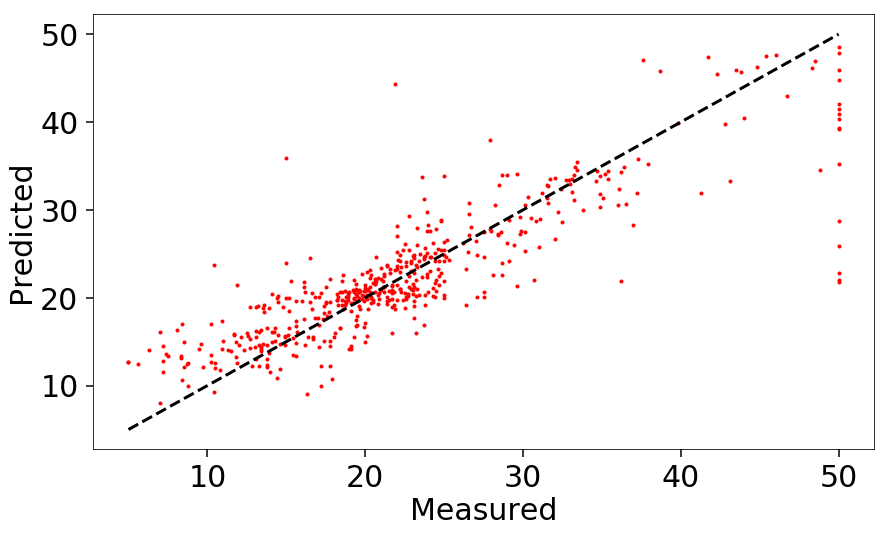

In [23]:
figure(figsize=(14, 8))
plot(y, yp, 'r.')
plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
xlabel('Measured')
ylabel('Predicted');

One really slick thing about decision trees is the decisions actually give you a way to rank **feature importances**, which are computed based on how often a feature is used when deciding how to split the data.

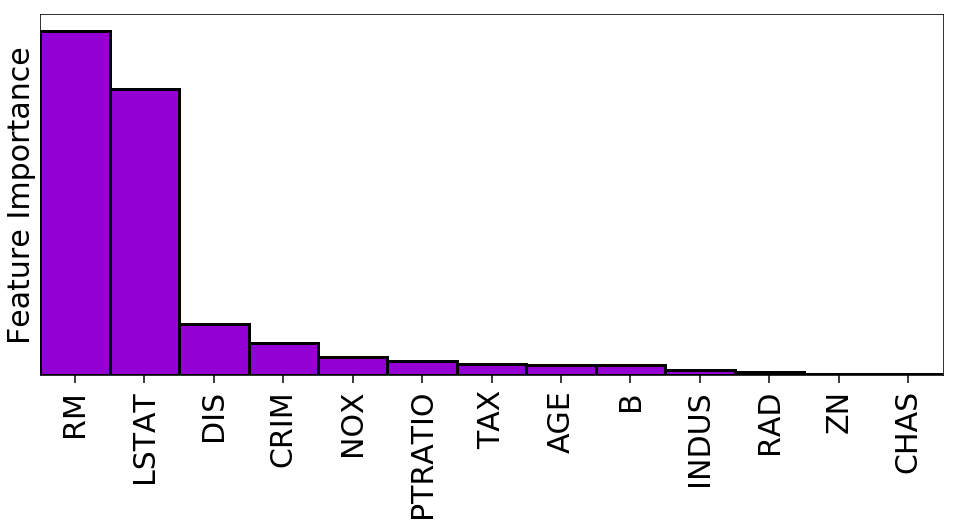

In [24]:
rf.fit(X_norm, y)  # fit all the data
feature_importances = rf.feature_importances_

figure(figsize=(14, 8))
idx = argsort(feature_importances)[::-1]
h = bar(arange(len(idx)), feature_importances[idx], width=1, lw=3,
        color='darkviolet', edgecolor='black')
xticks(arange(len(idx)), boston.feature_names[idx], rotation='vertical')
xlim([-0.5, len(idx) - 0.5])
ylabel('Feature Importance')
yticks([])
tight_layout()

We can compare how the two regression techniques do computing their relative **scores** to better quantify which one works better (and by how much). We'll use the  **mean square error (MSE)** for this comparison.

In [25]:
from sklearn.model_selection import cross_val_score  # cross-validation scoring

# linear regression
lr_scores = -cross_val_score(lr, X_norm, y, cv=50, scoring='neg_mean_squared_error')
print('Linear Regression (16-50-84):', percentile(lr_scores, [16, 50, 84]))

# random forests
rf_scores = -cross_val_score(rf, X_norm, y, cv=50, scoring='neg_mean_squared_error')
print('Random Forest (16-50-84):', percentile(rf_scores, [16, 50, 84]))

Linear Regression (16-50-84): [  4.71119657  17.48369075  30.59414161]
Random Forest (16-50-84): [  2.9187788    7.66740975  17.86281095]


## Isotonic Regression

You don't have to choose between completely non-parametric methods and extremely linear ones: there's tons of cool stuff out there to try to fit your dataset. One example is **isotonic regression**, which is attempts to fit a strictly-increasing model to your data. This is useful if you have some reason to believe your underlying function should always be increasing, as is the case below.

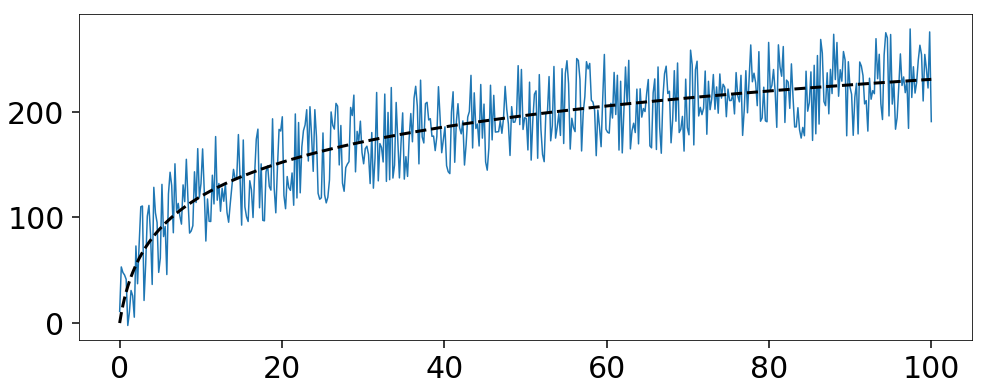

In [26]:
# create mock data
n = 500
x = linspace(0, 100, n)
y = randint(-50, 50, size=n) + 50. * log(1 + x)

# plot results
figure(figsize=(16, 6))
plot(x, y)
plot(x, 50 * log(1 + x), color='black', ls='--', lw=3);

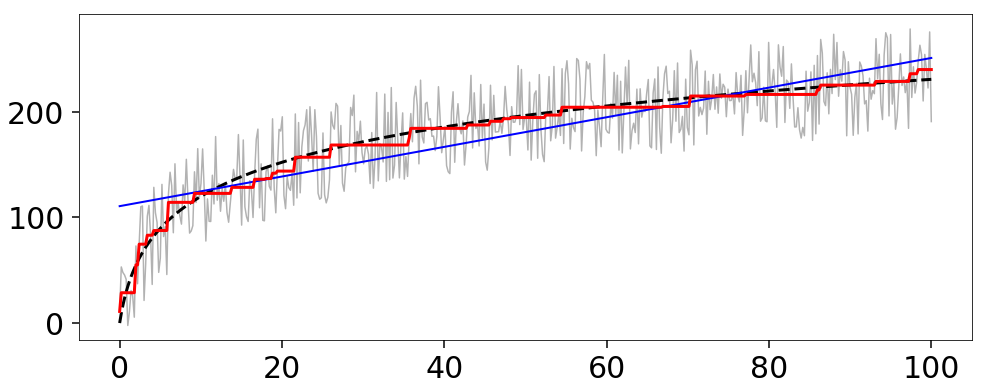

In [27]:
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression

# isotonic regression
ir = IsotonicRegression()
yp = ir.fit_transform(x, y)

# linear regression (for comparison)
lr = LinearRegression()
lr.fit(x[:, None], y)
yp2 = lr.predict(x[:, None])

# plot results
figure(figsize=(16, 6))
plot(x, y, alpha=0.3, color='black')
plot(x, 50 * log(1 + x), color='black', ls='--', lw=3)
plot(x, yp2, color='blue', lw=2)
plot(x, yp, color='red', lw=3);

## Kernel Ridge Regression and Gaussian Process Regression

Finally, we can look at more methods that take advantage of the **"kernel trick"** first demonstrated for SVMs to do all sorts of fun things. The first method is **Kernel Ridge Regression**, which involves a combination of kernels and ridge regression (a more form of regularized regression). The second involves **Gaussian Processes** (GPs), which are magical things that take advantage of cool math stuff related to multivariate Gaussians coupled with some assumptions about the covariances using kernels.

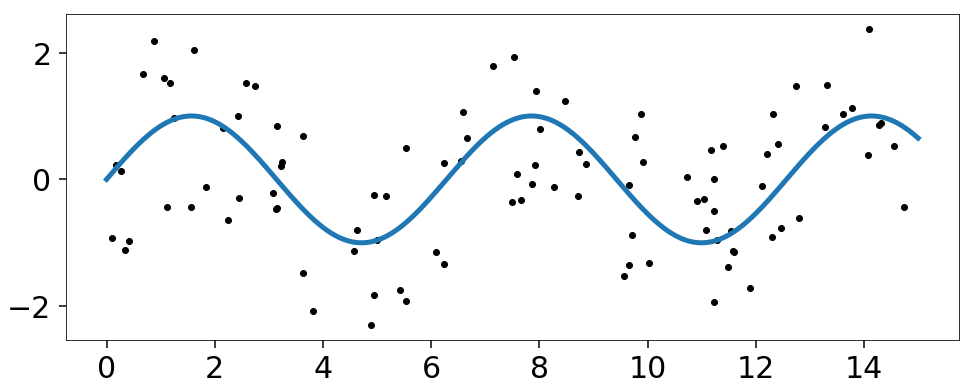

In [28]:
# generate sample data
X = 15 * rand(100, 1)
y = sin(X).ravel() + 3 * (0.5 - rand(X.shape[0]))  # sin w/ white noise

# grid used to evaluate predictions
X_plot = linspace(0, 40, 1000)[:, None]

# plot data
figure(figsize=(16, 6))
plot(X, y, 'ko')
plot(linspace(0, 15, 1000), sin(linspace(0, 15, 1000)), lw=5);

As you can imagine, both of these functions now involves a decent amount of **hyperparameters** that we either need to **optimize** or **marginalize** over. The simplest way to do this is by executing a grid search over the hyperparameters, which we do below.

In [29]:
from sklearn.kernel_ridge import KernelRidge  # kernel ridge regression
from sklearn.model_selection import GridSearchCV  # grid search cross-validation (for hyper-parameters)
from sklearn.gaussian_process import GaussianProcessRegressor  # GPs
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared  # kernels

In [30]:
# find optimal hyperparameters for KRR using a gridsearch and fitting data
param_grid = {"alpha": [1e0,1e-1,1e-2,1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in logspace(-2, 2, 10)
                         for p in logspace(0, 2, 10)]}

kr = GridSearchCV(KernelRidge(), cv=5, param_grid=param_grid)
kr.fit(X, y)
y_kr = kr.predict(X_plot)

# print out our best-fit parameters
print(kr.best_params_)

{'alpha': 0.001, 'kernel': ExpSineSquared(length_scale=1.67, periodicity=21.5)}


In [31]:
# fit GP with exponential since squared kernel + whitenoise kernel
gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) + WhiteKernel(1e-1)
gpr = GaussianProcessRegressor(kernel=gp_kernel, n_restarts_optimizer=50)
gpr.fit(X,y)
y_gpr, y_std = gpr.predict(X_plot, return_std=True)

# print out our best-fit parameters
print(gpr.kernel_)
print('True noise (std):', 3 * sqrt(1 / 12.))

ExpSineSquared(length_scale=1.47, periodicity=6.05) + WhiteKernel(noise_level=0.737)
True noise (std): 0.866025403784


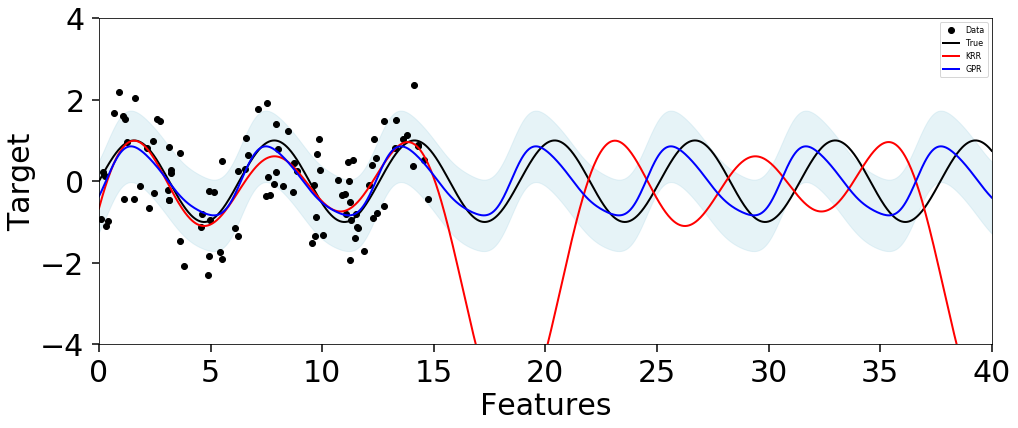

In [32]:
# plot results
figure(figsize=(16, 6))
plot(X, y, 'ko', label='Data')  # data
plot(X_plot, sin(X_plot), lw=2, color='black', label='True')  # truth
plot(X_plot, y_kr, color='red', lw=2, label='KRR')
plot(X_plot, y_gpr, color='blue', lw=2, label='GPR')
fill_between(X_plot[:,0], y_gpr - y_std, y_gpr + y_std,
             color='lightblue', alpha=0.3)
xlabel('Features')
ylabel('Target')
xlim([0, 40])
ylim([-4, 4])
legend(loc="best", scatterpoints=1, prop={'size': 8});

# Unsupervised Learning

## $k$-Means Clustering

The "bread and butter" of unsupervised learning is **$k$-means clustering**. This just involves partitioning the data into $k$ clusters, where we're trying to figure out where to put the cluster centers to partitions the data well. We can demonstrate this on the iris dataset.

In [33]:
from sklearn import cluster

# k-means
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(iris_X)

# results
print(k_means.labels_[::10])
print(iris_y[::10])

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


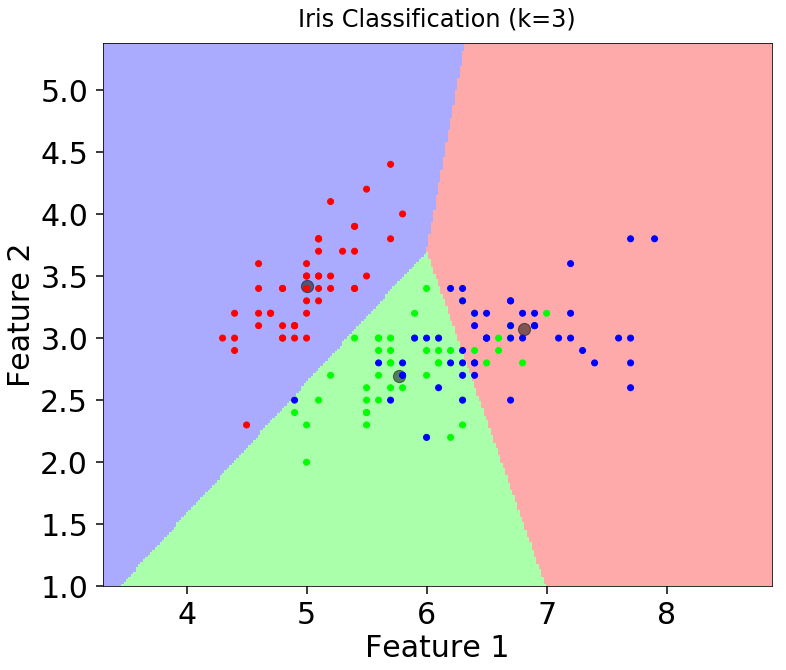

In [34]:
X = iris_X[:,:2]
y = iris_y

clf = k_means
clf.fit(X)
Z = clf.predict(c_[xx.ravel(), yy.ravel()])

# plot mesh
figure(figsize=(12, 10))
Z = Z.reshape(xx.shape)
pcolormesh(xx, yy, Z, cmap=cmap_light)

# plot the training points too
scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1],
        color='black', cmap=cmap_bold, s=150, alpha=0.5)
scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
xlim(xx.min(), xx.max())
xlabel('Feature 1')
ylim(yy.min(), yy.max())
ylabel('Feature 2')
title("Iris Classification (k=%i)" % (k_means.n_clusters), fontsize=24, y=1.02);

# PCA

The final thing to cover is the simplest form of dimensionality reduction known as **Principal Component Analysis** (PCA). This involves finding linear combinations of the features that explain the maximum amount of variance. Often, this is the best way to remove linear-ish correlations among parameters, which can (1) help visualize things, (2) help reduce the effective data size (by limiting yourself to the maximally-informative PCA components), and (3) reduce correlations among components (which helps interpret feature importances).

Explained Variance Ratio: [ 0.92461621  0.05301557  0.01718514  0.00518309]


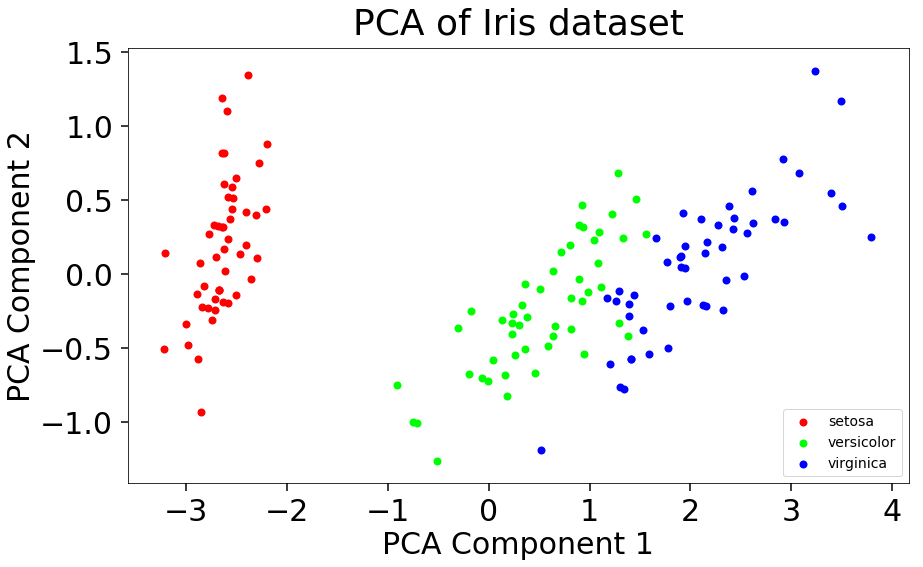

In [35]:
from sklearn.decomposition import PCA

pca = PCA()
X_r = pca.fit(iris_X).transform(iris_X)  # limit to top 2 components

# percentage of variance explained by each component
print('Explained Variance Ratio: %s' % str(pca.explained_variance_ratio_))

figure(figsize=(14, 8))
colors=['#FF0000', '#00FF00', '#0000FF']

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    scatter(X_r[y==i, 0], X_r[y==i, 1], color=color, lw=2, label=target_name)
xlabel('PCA Component 1')
ylabel('PCA Component 2')
legend(loc='best', scatterpoints=1, fontsize=14)
title('PCA of Iris dataset', y=1.02);

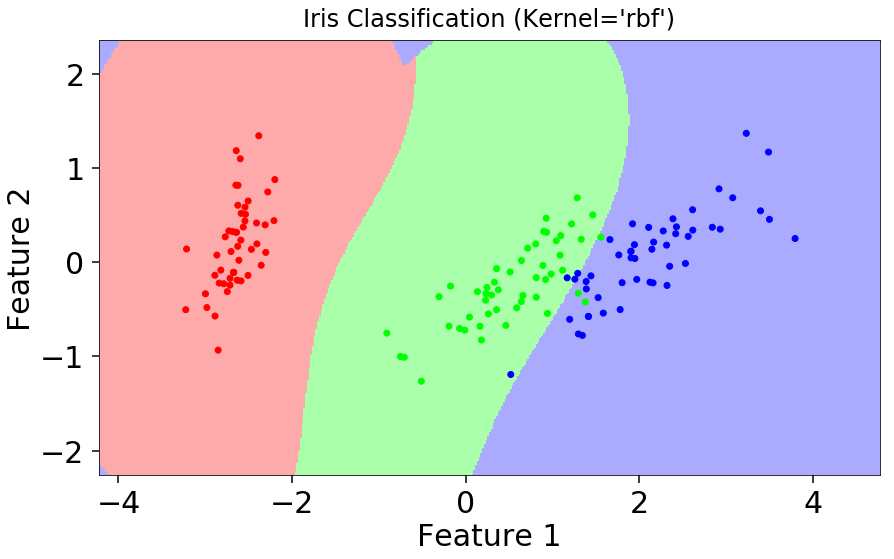

In [36]:
X = X_r[:,:2]

h = 0.02  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = meshgrid(arange(x_min, x_max, h), arange(y_min, y_max, h))  # (X,Y) mesh

clf = svc
clf.fit(X, y)
Z = clf.predict(c_[xx.ravel(), yy.ravel()])

# plot mesh
figure(figsize=(14, 8))
Z = Z.reshape(xx.shape)
pcolormesh(xx, yy, Z, cmap=cmap_light)

# plot the training points too
scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
xlim(xx.min(), xx.max())
xlabel('Feature 1')
ylim(yy.min(), yy.max())
ylabel('Feature 2')
title("Iris Classification (Kernel='%s')" % (svc.kernel), fontsize=24, y=1.02);

So we see we do much better in 2-D once we limit ourselves to the top PCA components than we do in the native feature space.

## Summary

Scikit-learn is quite easy to use and reasonably expansive, so feel free to jump right in and start experimenting!